In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_files = os.listdir('Resources')
legis_file = 'Resources/Legislative Partison Composition by State 2020-04-01 - Processed.csv'

In [3]:
census_df = pd.read_excel('resources/nst-est2019-01 - 2019 Clean.xlsx')
census_df

,State,Population
0,.Alabama,4903185
1,.Alaska,731545
2,.Arizona,7278717
3,.Arkansas,3017804
4,.California,39512223
5,.Colorado,5758736
6,.Connecticut,3565287
7,.Delaware,973764
8,.Florida,21477737
9,.Georgia,10617423


In [4]:

legis_df = pd.read_csv(legis_file)
legis_df.head()

,STATE,Total Seats,Total Senate,Senate Dem.,Senate Rep.,Senate other,Senate vacancy,Total House,House Dem.,House Rep.,House other,House vacancy,Legis. Control,Gov. Party,State Control
0,Alabama,140,35,8.0,27.0,NaN,NaN,105.0,28.0,77.0,NaN,NaN,Rep,Rep,Rep
1,Alaska,60,20,7.0,13.0,NaN,NaN,40.0,15.0,23.0,2.0,NaN,Rep,Rep,Rep
2,Arizona,90,30,13.0,17.0,NaN,NaN,60.0,29.0,31.0,NaN,NaN,Rep,Rep,Rep
3,Arkansas,135,35,9.0,26.0,NaN,NaN,100.0,24.0,76.0,NaN,NaN,Rep,Rep,Rep
4,California,120,40,29.0,10.0,NaN,1.0,80.0,61.0,18.0,1.0,NaN,Dem,Dem,Dem


In [5]:
state_control_df = pd.DataFrame(legis_df[['STATE','State Control']])
state_control_df.head()

,STATE,State Control
0,Alabama,Rep
1,Alaska,Rep
2,Arizona,Rep
3,Arkansas,Rep
4,California,Dem


In [6]:
data_list_dict = []

In [7]:
for file in data_files:
    if(re.match('aacer.+state.+.xlsx', file) and not re.match('.+dec.+', file)):
        print(file)
        
        df = pd.read_excel(f'Resources/{file}')
        
        state_header = pd.Series(df.iloc[0,0])
        state_header = list(state_header)

        other_headers = pd.Series(df.iloc[1,1:])
        other_headers = list(other_headers.values)

        df_labels = state_header + other_headers

        df.columns = df_labels

        df = df.iloc[2:,:]
        
        file_series = df.iloc[:,0]
        file_df = pd.DataFrame({'filename': file_series})
        file_df['filename'] = file[6:14]
        file_series = pd.to_datetime(file_df['filename'], format='%b-%Y')
        
        data_dict = {
            'Month and Year': list(file_series.values),
            'STATE': list(df.iloc[:,0].values),
            'Cumulative': list(df.iloc[:,1].values),
            'Chapter 7': list(df.iloc[:,4].values),
            'Chapter 13': list(df.iloc[:,5].values)
        }
        
        data_list_dict.append(data_dict)

#state, cum ttl, chap 7, chap 13

aacer-apr-2019-nationwide-bankruptcy-filings-by-state-and-jurisdiction.xlsx
aacer-apr-2020-nationwide-bankruptcy-filings-by-state-and-jurisdiction.xlsx
aacer-aug-2019-nationwide-bankruptcy-filings-by-state-and-jurisdiction.xlsx
aacer-aug-2020-nationwide-bankruptcy-filings-by-state-and-jurisdiction.xlsx
aacer-feb-2019-nationwide-bankruptcy-filings-by-state-and-jurisdiction.xlsx
aacer-feb-2020-nationwide-bankruptcy-filings-by-state-and-jurisdiction.xlsx
aacer-jan-2019-nationwide-bankruptcy-filings-by-state-and-jurisdiction.xlsx
aacer-jan-2020-nationwide-bankruptcy-filings-by-state-and-jurisdiction.xlsx
aacer-jul-2019-nationwide-bankruptcy-filings-by-state-and-jurisdiction.xlsx
aacer-jul-2020-nationwide-bankruptcy-filings-by-state-and-jurisdiction.xlsx
aacer-jun-2019-nationwide-bankruptcy-filings-by-state-and-jurisdiction.xlsx
aacer-jun-2020-nationwide-bankruptcy-filings-by-state-and-jurisdiction.xlsx
aacer-mar-2019-nationwide-bankruptcy-filings-by-state-and-jurisdiction.xlsx
aacer-mar-20

In [8]:
data_df = pd.DataFrame(data_list_dict[0])

In [9]:
# hack to create a blank dataframe
data_df = data_df.loc[data_df['Month and Year'] == 'x']

In [10]:
for data in data_list_dict:
    data_df = data_df.append(pd.DataFrame(data))
    print(len(data_df))

59
118
177
236
295
354
413
472
531
590
649
708
767
826
885
944
1003
1062
1121
1180


In [11]:
data_df = data_df.loc[data_df['Cumulative'].notnull()]
#data_df['Cumulative'].notnull()
# also filter out the total rows 


In [12]:
data_df

,Month and Year,STATE,Cumulative,Chapter 7,Chapter 13
0,2019-04-01,Alabama,8862.0,3386.0,5452.0
1,2019-04-01,Alaska,138.0,105.0,30.0
2,2019-04-01,Arizona,5300.0,4207.0,1048.0
3,2019-04-01,Arkansas,3537.0,1777.0,1748.0
4,2019-04-01,California,22795.0,17234.0,5339.0
...,...,...,...,...,...
51,2020-09-01,Total States and DC,416072.0,288637.0,120763.0
53,2020-09-01,Guam,49.0,43.0,6.0
54,2020-09-01,Puerto Rico,3923.0,1748.0,2148.0
55,2020-09-01,Virgin Islands,4.0,4.0,0.0


In [13]:
data_df = data_df.sort_values(['STATE','Month and Year'])
data_df

,Month and Year,STATE,Cumulative,Chapter 7,Chapter 13
0,2019-01-01,Alabama,2081.0,666.0,1407.0
0,2019-02-01,Alabama,4117.0,1404.0,2700.0
0,2019-03-01,Alabama,6592.0,2497.0,4079.0
0,2019-04-01,Alabama,8862.0,3386.0,5452.0
0,2019-05-01,Alabama,11089.0,4194.0,6866.0
...,...,...,...,...,...
50,2020-05-01,Wyoming,246.0,220.0,22.0
50,2020-06-01,Wyoming,311.0,284.0,23.0
50,2020-07-01,Wyoming,378.0,339.0,29.0
50,2020-08-01,Wyoming,456.0,412.0,33.0


In [14]:
data_df.set_index('STATE', inplace=True)
data_df

,Month and Year,Cumulative,Chapter 7,Chapter 13
STATE,,,,
Alabama,2019-01-01,2081.0,666.0,1407.0
Alabama,2019-02-01,4117.0,1404.0,2700.0
Alabama,2019-03-01,6592.0,2497.0,4079.0
Alabama,2019-04-01,8862.0,3386.0,5452.0
Alabama,2019-05-01,11089.0,4194.0,6866.0
...,...,...,...,...
Wyoming,2020-05-01,246.0,220.0,22.0
Wyoming,2020-06-01,311.0,284.0,23.0
Wyoming,2020-07-01,378.0,339.0,29.0


In [15]:
master_df = data_df[0:0]

for i in data_df.index.unique():
    df = data_df.loc[i]

    df['Total_C7_C13'] = df['Cumulative'].diff()
    
    master_df = master_df.append(df)

<ipython-input-15-d68a05cf96b5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_C7_C13'] = df['Cumulative'].diff()


In [16]:
pd.set_option('display.max_rows', None)

master_df

,Month and Year,Cumulative,Chapter 7,Chapter 13,Total_C7_C13
STATE,,,,,
Alabama,2019-01-01,2081.0,666.0,1407.0,NaN
Alabama,2019-02-01,4117.0,1404.0,2700.0,2036.0
Alabama,2019-03-01,6592.0,2497.0,4079.0,2475.0
Alabama,2019-04-01,8862.0,3386.0,5452.0,2270.0
Alabama,2019-05-01,11089.0,4194.0,6866.0,2227.0
Alabama,2019-06-01,13123.0,4849.0,8241.0,2034.0
Alabama,2019-07-01,15413.0,5587.0,9790.0,2290.0
Alabama,2019-08-01,17816.0,6363.0,11412.0,2403.0
Alabama,2019-09-01,20020.0,7079.0,12894.0,2204.0


In [17]:
#Replace NaN value
master_df.reset_index(inplace=True)

for k, v in (master_df.loc[master_df['Total_C7_C13'].isnull()]).iterrows():
    master_df.loc[k, 'Total_C7_C13'] = master_df.loc[k, 'Cumulative']
    

master_df.head(1000)

,STATE,Month and Year,Cumulative,Chapter 7,Chapter 13,Total_C7_C13
0,Alabama,2019-01-01,2081.0,666.0,1407.0,2081.0
1,Alabama,2019-02-01,4117.0,1404.0,2700.0,2036.0
2,Alabama,2019-03-01,6592.0,2497.0,4079.0,2475.0
3,Alabama,2019-04-01,8862.0,3386.0,5452.0,2270.0
4,Alabama,2019-05-01,11089.0,4194.0,6866.0,2227.0
5,Alabama,2019-06-01,13123.0,4849.0,8241.0,2034.0
6,Alabama,2019-07-01,15413.0,5587.0,9790.0,2290.0
7,Alabama,2019-08-01,17816.0,6363.0,11412.0,2403.0
8,Alabama,2019-09-01,20020.0,7079.0,12894.0,2204.0
9,Alabama,2019-10-01,22564.0,7882.0,14627.0,2544.0


In [18]:
#Replace negative cells

for k, v in (master_df.loc[master_df['Total_C7_C13'] <0]).iterrows():
    master_df.loc[k, 'Total_C7_C13'] = master_df.loc[k, 'Cumulative']
    
master_df   

,STATE,Month and Year,Cumulative,Chapter 7,Chapter 13,Total_C7_C13
0,Alabama,2019-01-01,2081.0,666.0,1407.0,2081.0
1,Alabama,2019-02-01,4117.0,1404.0,2700.0,2036.0
2,Alabama,2019-03-01,6592.0,2497.0,4079.0,2475.0
3,Alabama,2019-04-01,8862.0,3386.0,5452.0,2270.0
4,Alabama,2019-05-01,11089.0,4194.0,6866.0,2227.0
5,Alabama,2019-06-01,13123.0,4849.0,8241.0,2034.0
6,Alabama,2019-07-01,15413.0,5587.0,9790.0,2290.0
7,Alabama,2019-08-01,17816.0,6363.0,11412.0,2403.0
8,Alabama,2019-09-01,20020.0,7079.0,12894.0,2204.0
9,Alabama,2019-10-01,22564.0,7882.0,14627.0,2544.0


In [19]:
master_df.groupby('STATE')
master_df

,STATE,Month and Year,Cumulative,Chapter 7,Chapter 13,Total_C7_C13
0,Alabama,2019-01-01,2081.0,666.0,1407.0,2081.0
1,Alabama,2019-02-01,4117.0,1404.0,2700.0,2036.0
2,Alabama,2019-03-01,6592.0,2497.0,4079.0,2475.0
3,Alabama,2019-04-01,8862.0,3386.0,5452.0,2270.0
4,Alabama,2019-05-01,11089.0,4194.0,6866.0,2227.0
5,Alabama,2019-06-01,13123.0,4849.0,8241.0,2034.0
6,Alabama,2019-07-01,15413.0,5587.0,9790.0,2290.0
7,Alabama,2019-08-01,17816.0,6363.0,11412.0,2403.0
8,Alabama,2019-09-01,20020.0,7079.0,12894.0,2204.0
9,Alabama,2019-10-01,22564.0,7882.0,14627.0,2544.0


In [20]:
#Combine DataFrame of bankruptcy and State control by Dem or Rep
merge_df = pd.merge(master_df,state_control_df, on='STATE', how = 'outer')
merge_df

,STATE,Month and Year,Cumulative,Chapter 7,Chapter 13,Total_C7_C13,State Control
0,Alabama,2019-01-01,2081.0,666.0,1407.0,2081.0,Rep
1,Alabama,2019-02-01,4117.0,1404.0,2700.0,2036.0,Rep
2,Alabama,2019-03-01,6592.0,2497.0,4079.0,2475.0,Rep
3,Alabama,2019-04-01,8862.0,3386.0,5452.0,2270.0,Rep
4,Alabama,2019-05-01,11089.0,4194.0,6866.0,2227.0,Rep
5,Alabama,2019-06-01,13123.0,4849.0,8241.0,2034.0,Rep
6,Alabama,2019-07-01,15413.0,5587.0,9790.0,2290.0,Rep
7,Alabama,2019-08-01,17816.0,6363.0,11412.0,2403.0,Rep
8,Alabama,2019-09-01,20020.0,7079.0,12894.0,2204.0,Rep
9,Alabama,2019-10-01,22564.0,7882.0,14627.0,2544.0,Rep


In [31]:
census_df['Per 100k'] = census_df['Population']/100000
census_df['State'] = census_df['State'].str.replace('.','')
census_df

In [37]:
len(merge_df)

#1120
merge_df_w_pop = pd.merge(merge_df, census_df, left_on='STATE', right_on='State', how='left')
merge_df_w_pop

,STATE,Month and Year,Cumulative,Chapter 7,Chapter 13,Total_C7_C13,State Control,State,Population,Per 100k
0,Alabama,2019-01-01,2081.0,666.0,1407.0,2081.0,Rep,Alabama,4903185.0,49.03185
1,Alabama,2019-02-01,4117.0,1404.0,2700.0,2036.0,Rep,Alabama,4903185.0,49.03185
2,Alabama,2019-03-01,6592.0,2497.0,4079.0,2475.0,Rep,Alabama,4903185.0,49.03185
3,Alabama,2019-04-01,8862.0,3386.0,5452.0,2270.0,Rep,Alabama,4903185.0,49.03185
4,Alabama,2019-05-01,11089.0,4194.0,6866.0,2227.0,Rep,Alabama,4903185.0,49.03185
5,Alabama,2019-06-01,13123.0,4849.0,8241.0,2034.0,Rep,Alabama,4903185.0,49.03185
6,Alabama,2019-07-01,15413.0,5587.0,9790.0,2290.0,Rep,Alabama,4903185.0,49.03185
7,Alabama,2019-08-01,17816.0,6363.0,11412.0,2403.0,Rep,Alabama,4903185.0,49.03185
8,Alabama,2019-09-01,20020.0,7079.0,12894.0,2204.0,Rep,Alabama,4903185.0,49.03185
9,Alabama,2019-10-01,22564.0,7882.0,14627.0,2544.0,Rep,Alabama,4903185.0,49.03185


In [21]:
merge_df['State Control'].value_counts()

Rep        420
Dem        300
Divided    260
Name: State Control, dtype: int64

In [51]:
plot_data_df = merge_df_w_pop.groupby(['State Control','Month and Year'])

cumulative_sum_series = plot_data_df['Total_C7_C13'].sum()
per100k_series = plot_data_df['Per 100k'].mean()


plot_data_df = pd.concat([cumulative_sum_series, per100k_series], axis=1)
plot_data_df['Weighted Value'] = plot_data_df['Total_C7_C13'] / plot_data_df['Per 100k']
plot_data_df

Total_C7_C13   Per 100k  Weighted Value
State Control Month and Year                                         
Dem           2019-01-01           19699.0  80.121441      245.864276
              2019-02-01           19472.0  80.121441      243.031077
              2019-03-01           24772.0  80.121441      309.180661
              2019-04-01           24338.0  80.121441      303.763884
              2019-05-01           23495.0  80.121441      293.242356
              2019-06-01           20412.0  80.121441      254.763267
              2019-07-01           21571.0  80.121441      269.228808
              2019-08-01           21621.0  80.121441      269.852861
              2019-09-01           20391.0  80.121441      254.501165
              2019-10-01           22612.0  80.121441      282.221585
              2019-11-01           18622.0  80.121441      232.422181
              2020-01-01           19432.0  80.121441      242.531835
              2020-02-01           19146.0  80.121441      238.962253
              2020-03-01           20157.0  80.121441      251.580599
              2020-04-01           12466.0  80.121441      155.588815
              2020-05-01           13159.0  80.121441      164.238185
              2020-06-01           13649.0  80.121441      170.353901
              2020-07-01           14521.0  80.121441      181.237380
              2020-08-01           13004.0  80.121441      162.303622
              2020-09-01           13166.0  80.121441      164.325552
Divided       2019-01-01           11671.0  55.968798      208.526899
              2019-02-01           11163.0  55.968798      199.450414
              2019-03-01           15017.0  55.968798      268.310209
              2019-04-01           14850.0  55.968798      265.326403
              2019-05-01           13942.0  55.968798      249.103079
              2019-06-01           12452.0  55.968798      222.481103
              2019-07-01           12612.0  55.968798      225.339838
              2019-08-01           12959.0  55.968798      231.539721
              2019-09-01           12029.0  55.968798      214.923320
              2019-10-01           13565.0  55.968798      242.367183
              2019-11-01           11076.0  55.968798      197.895976
              2020-01-01           11414.0  55.968798      203.935055
              2020-02-01           11144.0  55.968798      199.110939
              2020-03-01           12854.0  55.968798      229.663676
              2020-04-01            7467.0  55.968798      133.413620
              2020-05-01            7554.0  55.968798      134.968057
              2020-06-01            8081.0  55.968798      144.384018
              2020-07-01            8052.0  55.968798      143.865872
              2020-08-01            7486.0  55.968798      133.753095
              2020-09-01            7572.0  55.968798      135.289665
Rep           2019-01-01           25331.0  63.170365      400.994990
              2019-02-01           24493.0  63.170365      387.729276
              2019-03-01           32553.0  63.170365      515.320750
              2019-04-01           30963.0  63.170365      490.150720
              2019-05-01           30227.0  63.170365      478.499687
              2019-06-01           27185.0  63.170365      430.344195
              2019-07-01           29107.0  63.170365      460.769855
              2019-08-01           30831.0  63.170365      488.061133
              2019-09-01           27722.0  63.170365      438.845017
              2019-10-01           30463.0  63.170365      482.235616
              2019-11-01           25441.0  63.170365      402.736313
              2020-01-01           26423.0  63.170365      418.281577
              2020-02-01           24883.0  63.170365      393.903057
              2020-03-01           29056.0  63.170365      459.962514
              2020-04-01           18056.0  63.170365      285.830230
              2020-05-01           18584

In [48]:
#census_df

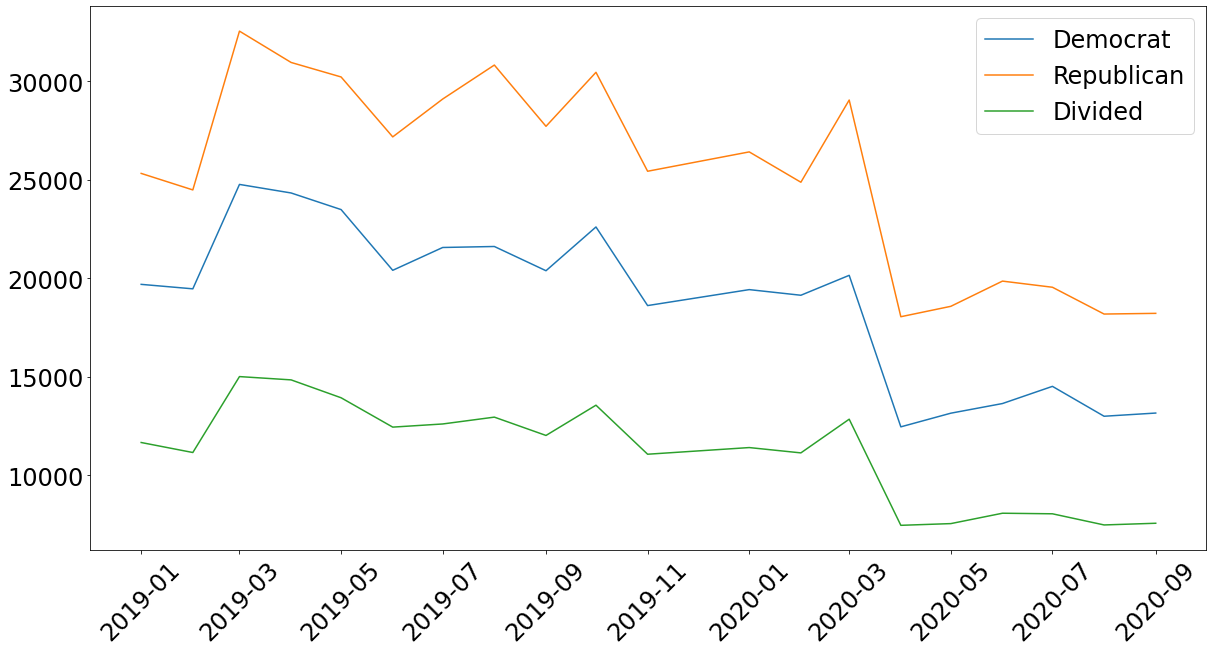

In [52]:
dem_df = plot_data_df.loc['Dem']
rep_df = plot_data_df.loc['Rep']
div_df = plot_data_df.loc['Divided']


plt.plot('Total_C7_C13', data=dem_df, label='Democrat')
plt.plot('Total_C7_C13', data=rep_df, label='Republican')
plt.plot('Total_C7_C13', data=div_df, label='Divided')

fig = plt.gcf()
fig.set_size_inches(20,10)

plt.legend()
plt.xticks(rotation=45)

plt.rcParams.update({'font.size':24})

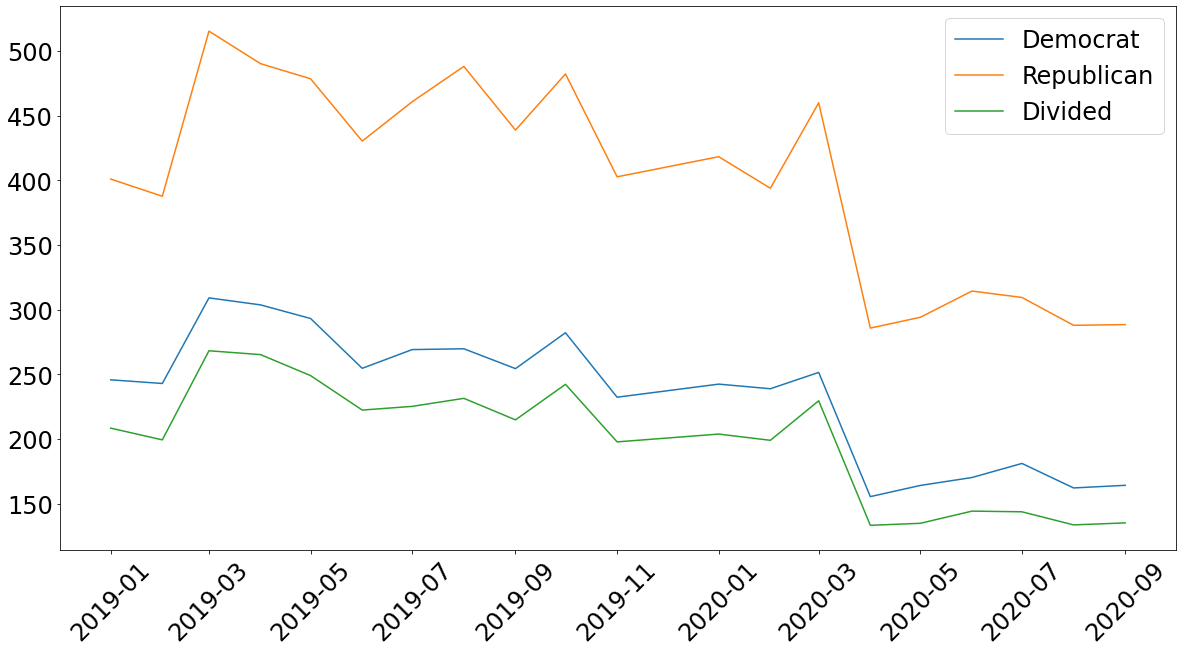

In [53]:
dem_df = plot_data_df.loc['Dem']
rep_df = plot_data_df.loc['Rep']
div_df = plot_data_df.loc['Divided']


plt.plot('Weighted Value', data=dem_df, label='Democrat')
plt.plot('Weighted Value', data=rep_df, label='Republican')
plt.plot('Weighted Value', data=div_df, label='Divided')

fig = plt.gcf()
fig.set_size_inches(20,10)

plt.legend()
plt.xticks(rotation=45)

plt.rcParams.update({'font.size':24})

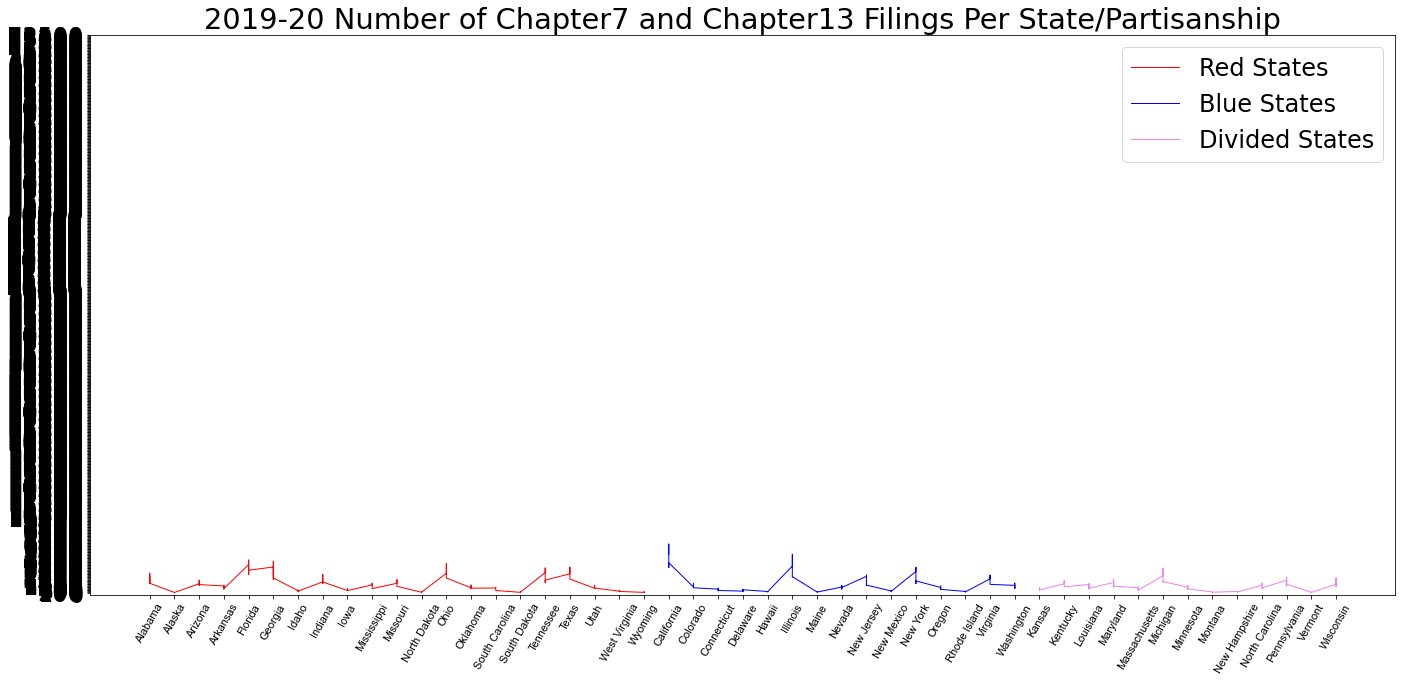

In [25]:
#line graph of x and y axis

plt.figure(figsize=(20,10))

#setting x axis 
repstate = merge_df.loc[(merge_df['State Control'] =='Rep','STATE')]
demstate = merge_df.loc[(merge_df['State Control'] =='Dem','STATE')]
divstate = merge_df.loc[(merge_df['State Control'] =='Divided','STATE')]


#setting x,y variable pairs (elevens and state)
repelevens, = plt.plot(repstate,merge_df.loc[(merge_df['State Control'] =='Rep','Total_C7_C13')], color= 'red', label = "Red States", linewidth=1) 
demelevens,  = plt.plot(demstate,merge_df.loc[(merge_df['State Control'] =='Dem','Total_C7_C13')], color= 'blue', label = "Blue States", linewidth=1) 
divelevens, = plt.plot(divstate, merge_df.loc[(merge_df['State Control'] =='Divided','Total_C7_C13')], color= 'violet', label = "Divided States", linewidth=1) 


#setting properties 
plt.yticks(np.arange(round(merge_df['Total_C7_C13'].min()), 
                     round(merge_df['Total_C7_C13'].max())+ 20, 100))  
plt.xticks(rotation=60, fontsize = 11, fontname='Arial')
plt.title("2019-20 Number of Chapter7 and Chapter13 Filings Per State/Partisanship")  
#plt.invert_xaxis()

#set legend outside of box 
plt.legend(bbox_to_anchor=(1, 1),handles=[repelevens, demelevens, divelevens])
plt.tight_layout() 
plt.show()